In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#loading data
dataset = load_dataset('coachprerakmehta/data_jobs')
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) and pd.notna(skill_list) else skill_list)

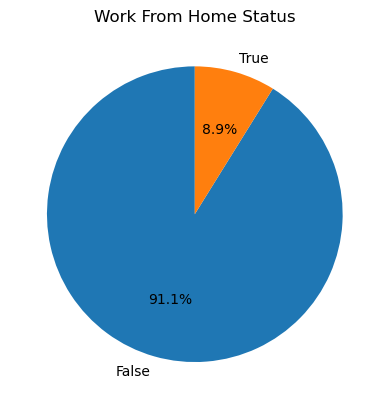

In [10]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct="%1.1f%%")       #auto-percentage - 1.1f: show one decimal place (e.g., 60.0%), %%: show the percent sign
plt.title("Work From Home Status")
plt.ylabel("")
plt.show()

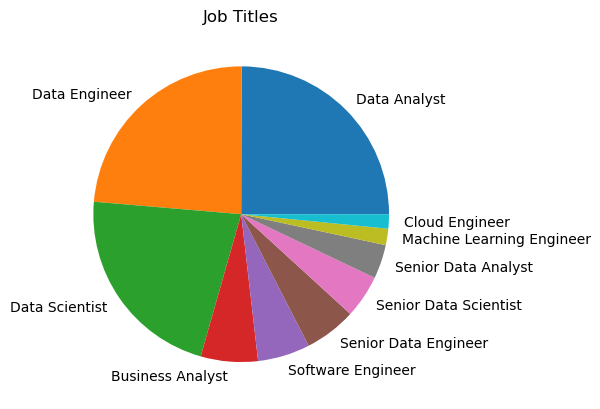

In [5]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title("Job Titles")
plt.ylabel("")
plt.show()

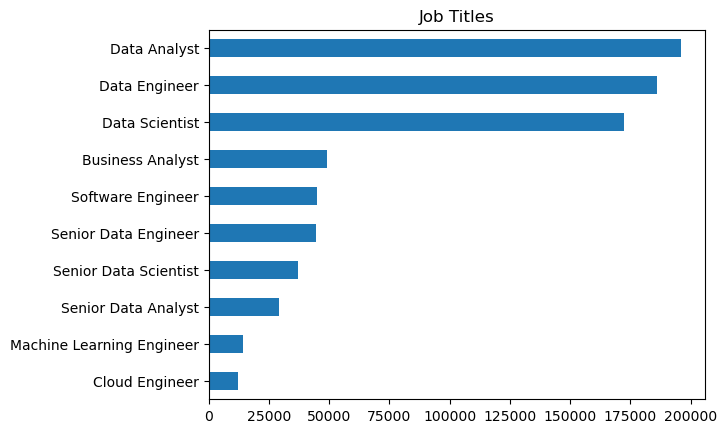

In [6]:
df['job_title_short'].value_counts().plot(kind='barh')
plt.title("Job Titles")
plt.gca().invert_yaxis()
plt.ylabel("")
plt.show()

In [11]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


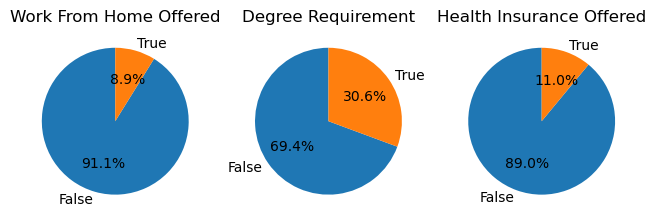

In [20]:
fig, ax = plt.subplots(1, 3)
dict_column = {
    'job_work_from_home' : "Work From Home Offered",
    'job_no_degree_mention' : "Degree Requirement",
    'job_health_insurance' : "Health Insurance Offered"
}

for i, (column, title) in enumerate (dict_column.items()):
    #print(i, column, title)
    ax[i].pie(df[column].value_counts(), startangle=90, autopct="%1.1f%%", labels=[False, True])     #big value should be labelled first
    ax[i].set_title(title)

fig.tight_layout()
plt.show()